**Image Classification by Mahmudin Rizal (Mahmudinrizal11@gmail.com)**

Dalam kasus ini akan diidentifikasi pengelompokan rock, paper, and scissor berdasarkan gambar. Dataset yang digunakan disediakan oleh dicoding

Import data dan mengelompokan data train sebanyak 60% dan data validation sebanyak 40%

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)  

2.5.0


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-22 09:20:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.20MB/s    in 73s     

2021-07-22 09:21:44 (4.22 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [10]:
import zipfile,os

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [11]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [12]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [53]:
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4 #40% for validation
)
train_data

In [54]:
train_generator = train_data.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_data.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Model**

membuat model dengan beberapa layer, dan tambahan optimizer dengan tambahan callback agar lebih efisien.

In [55]:
ourmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [56]:
ourmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 15, 256)       

In [57]:
#compile model
ourmodel.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [58]:
# callbacks for early stop when reach our target accuracy
accuracy_threshold = 97e-2
class our_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped. Continue to predict')
            self.model.stop_training = True

In [59]:
# train data
history = ourmodel.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [our_callbacks()]
)

Epoch 1/25
30/30 - 38s - loss: 0.8772 - accuracy: 0.6021 - val_loss: 0.5142 - val_accuracy: 0.8000
Epoch 2/25
30/30 - 36s - loss: 0.3049 - accuracy: 0.8914 - val_loss: 0.2378 - val_accuracy: 0.9375
Epoch 3/25
30/30 - 36s - loss: 0.2497 - accuracy: 0.9151 - val_loss: 0.1744 - val_accuracy: 0.9625
Epoch 4/25
30/30 - 37s - loss: 0.1977 - accuracy: 0.9438 - val_loss: 0.4970 - val_accuracy: 0.8562
Epoch 5/25
30/30 - 37s - loss: 0.1777 - accuracy: 0.9417 - val_loss: 0.1607 - val_accuracy: 0.9688
Epoch 6/25
30/30 - 37s - loss: 0.1475 - accuracy: 0.9521 - val_loss: 0.3268 - val_accuracy: 0.9250
Epoch 7/25
30/30 - 36s - loss: 0.1604 - accuracy: 0.9484 - val_loss: 0.2727 - val_accuracy: 0.9250
Epoch 8/25
30/30 - 36s - loss: 0.1303 - accuracy: 0.9527 - val_loss: 0.1725 - val_accuracy: 0.9500
Epoch 9/25
30/30 - 36s - loss: 0.2194 - accuracy: 0.9280 - val_loss: 0.1804 - val_accuracy: 0.9438
Epoch 10/25
30/30 - 36s - loss: 0.1040 - accuracy: 0.9720 - val_loss: 0.2501 - val_accuracy: 0.9187

For Epoc

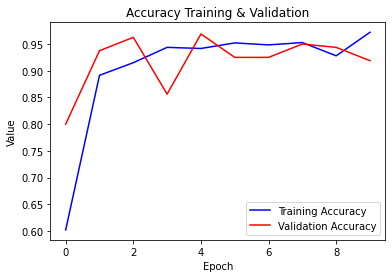

In [60]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

**Test Predict**

Akan diprediksi dengan sebuah input gambar, hasilnya akan menyatakan gambar masuk kedalam kelompok rock, paper, atau scissor.

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [35]:
image_input = files.upload()

Saving testing.jpeg to testing.jpeg


testing.jpeg
its easy, scissors!


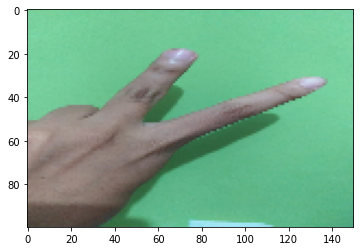

In [64]:
for fn in image_input.keys():
  # predict images
  path = fn
  image_source = image.load_img(path, target_size = (100, 150))
  imageplot = plt.imshow(image_source)
  x = image.img_to_array(image_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = ourmodel.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('its easy, rock!')
  elif classes[0, 1] == 1:
    print('its easy, paper')
  elif classes[0, 2] == 1:
    print('its easy, scissors!')
  else:
    print('i dont know')